## 1. Introduction
Data was scrapped from MyDramaList

## 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
import re

## 3. Exploring the data

In [2]:
df_dramas = pd.read_csv("dramas_data_v2.csv")
df_dramas.head()

,drama_id,title,drama_type,year,rating,episodes,url,genre,overview,tag,main_cast,country,aired,aired_on,original_network,duration,content_rating,image_url
0,1,Twinkling Watermelon\n\n,Korean Drama,2023,9.2,16,https://mydramalist.com/739603-sparkling-water...,"Romance, Youth, Drama, Fantasy","In 2023, Eun Gyeol is a CODA (Child of Deaf Ad...","Time Travel, Child From The Future, Sign Langu...","Ryeoun, Choi Hyun Wook, Seol In Ah, Shin Eun S...",South Korea,"Sep 25, 2023 - Nov 14, 2023","Monday, Tuesday","TVING, tvN",1 hr. 10 min.,15+ - Teens 15 or older,https://i.mydramalist.com/2w44jE_4c.jpg?v=1
1,2,Move to Heaven\n\n,Korean Drama,2021,9.1,10,https://mydramalist.com/49231-move-to-heaven,"Life, Drama",Han Geu Roo is an autistic 20-year-old. He wor...,"Uncle-Nephew Relationship, Autism, Death, Tear...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...",South Korea,"May 14, 2021",Friday,Netflix,52 min.,18+ Restricted (violence & profanity),https://i.mydramalist.com/Rle36_4c.jpg?v=1
2,3,Weak Hero Class 1\n\n,Korean Drama,2022,9.1,8,https://mydramalist.com/702267-weak-hero,"Action, Youth, Drama",Yeon Shi Eun is a model student who ranks at t...,"Skilled Fighter, Violence, Adapted From A Webt...","Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ...",South Korea,"Nov 18, 2022",Friday,Wavve,40 min.,18+ Restricted (violence & profanity),https://i.mydramalist.com/pq2lr_4c.jpg?v=1
3,4,Hospital Playlist Season 2\n\n,Korean Drama,2021,9.1,12,https://mydramalist.com/57173-hospital-playlist-2,"Romance, Life, Drama, Medical",Everyday is extraordinary for five doctors and...,"Multiple Mains, Band, Music, Multiple Couples,...","Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...",South Korea,"Jun 17, 2021 - Sep 16, 2021",Thursday,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,https://i.mydramalist.com/dKY0d_4c.jpg?v=1
4,5,Nirvana in Fire\n\n,Chinese Drama,2015,9.1,54,https://mydramalist.com/9025-nirvana-in-fire,"Military, Historical, Drama, Political","In sixth-century China, the Emperor of Great L...","Power Struggle, Smart Male Lead, Hidden Identi...","Hu Ge, Liu Tao, Wang Kai, Chen Long, Victor Hu...",China,"Sep 19, 2015 - Oct 15, 2015","Monday, Tuesday, Wednesday, Thursday, Friday, ...",BTV,45 min.,13+ - Teens 13 or older,https://i.mydramalist.com/kV54dc.jpg?v=1


### 3.1 Shape of the dataset and data type

In [3]:
df_dramas.shape
df_dramas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4980 entries, 0 to 4979
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   drama_id          4980 non-null   int64  
 1   title             4980 non-null   object 
 2   drama_type        4980 non-null   object 
 3   year              4980 non-null   int64  
 4   rating            4980 non-null   float64
 5   episodes          4980 non-null   int64  
 6   url               4980 non-null   object 
 7   genre             4980 non-null   object 
 8   overview          4968 non-null   object 
 9   tag               4943 non-null   object 
 10  main_cast         4980 non-null   object 
 11  country           4980 non-null   object 
 12  aired             4980 non-null   object 
 13  aired_on          4790 non-null   object 
 14  original_network  4743 non-null   object 
 15  duration          4980 non-null   object 
 16  content_rating    4980 non-null   object 


### 3.2 Check for duplicates

In [4]:
duplicates = df_dramas.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


### 3.3 Check for null values

In [5]:
print(df_dramas.isnull().sum())

drama_id              0
title                 0
drama_type            0
year                  0
rating                0
episodes              0
url                   0
genre                 0
overview             12
tag                  37
main_cast             0
country               0
aired                 0
aired_on            190
original_network    237
duration              0
content_rating        0
image_url             0
dtype: int64


Column `aired_on` and `original_network` is not needed for the recommendation modelling.

### 3.31 Display drama title and overview value that is null

In [6]:
null_overview = df_dramas[df_dramas['overview'].isnull()]
print(null_overview[['title', 'overview']])

                                            title overview
1207        Anata no Ban Desu - Counterattack\n\n      NaN
2221  Gintama 2: Yonimo Kimyo na Gintama-chan\n\n      NaN
2373     The Monkey King: Quest for the Sutra\n\n      NaN
2748                         Bang Rak Soi 9/1\n\n      NaN
2931                  What's Your Blood Type?\n\n      NaN
3183                       Hi Flower Season 2\n\n      NaN
3231                     Just One Bite: Pilot\n\n      NaN
3363     The Age Difference  in Love Season 1\n\n      NaN
3971               My Sassy Deskmate Season 2\n\n      NaN
4462        Watashi ga Kemono ni Natta Yoru 2\n\n      NaN
4490                             Office Watch\n\n      NaN
4522        Watashi ga Kemono ni Natta Yoru 3\n\n      NaN


### 3.32 Display drama title and tag value that is null

In [7]:
null_tag = df_dramas[df_dramas['tag'].isnull()]
print(null_tag[['title', 'tag']])

                             title  tag
1322            Got to Believe\n\n  NaN
1524             Ultraman Geed\n\n  NaN
1530  Line Walker: The Prelude\n\n  NaN
1775         Kamen Rider Black\n\n  NaN
2254   The Legendary Four Aces\n\n  NaN
2403              Ten Brothers\n\n  NaN
2453   While You Were Sleeping\n\n  NaN
2532            Ghetto Justice\n\n  NaN
2574          House of Spirits\n\n  NaN
2656     E.U. (Emergency Unit)\n\n  NaN
2698           The Seventh Day\n\n  NaN
2795      A Fistful of Stances\n\n  NaN
2946                    Dinner\n\n  NaN
2951               Square Pegs\n\n  NaN
2969                Aikurushii\n\n  NaN
3094                Ultraman X\n\n  NaN
3260         On the First Beat\n\n  NaN
3270              Happy Noodle\n\n  NaN
3328                 Mukodono!\n\n  NaN
3336             Friendly Fire\n\n  NaN
3371            Eye in the Sky\n\n  NaN
3381             Rock 'n' Road\n\n  NaN
3463          Life Made Simple\n\n  NaN
3495   Ghetto Justice Season 2\n\n  NaN


### 3.4 Statistic of the numerical columns in the dataframe

In [8]:
print(df_dramas.describe())

          drama_id         year       rating     episodes
count  4980.000000  4980.000000  4980.000000  4980.000000
mean   2490.500000  2017.270080     7.749759    22.033133
std    1437.746501     5.426715     0.391569    20.444958
min       1.000000  1966.000000     6.800000     1.000000
25%    1245.750000  2015.000000     7.500000    10.000000
50%    2490.500000  2019.000000     7.700000    16.000000
75%    3735.250000  2021.000000     8.000000    26.000000
max    4980.000000  2024.000000     9.200000   327.000000


### 3.5 Checking for various type of genres in the dataset

In [9]:
genres = df_dramas['genre']
genres.head()

0            Romance,  Youth,  Drama,  Fantasy
1                                 Life,  Drama
2                       Action,  Youth,  Drama
3             Romance,  Life,  Drama,  Medical
4    Military,  Historical,  Drama,  Political
Name: genre, dtype: object

### 3.6 Check the language type in the overview

In [10]:
df_dramas.overview[2]

'Yeon Shi Eun is a model student who ranks at the top of his high school. Physically, Yeon Shi Eun appears weak, but by using his wits and psychology, he fights against the violence that takes place inside and outside of his school.  (Source: Asianwiki) ~~ Adapted from the webtoon “Weak Hero” (약한영웅) written by SeoPass (서패스) and illustrated by Kim Jin Seok (김진석). ~~ Release dates: Oct 7, 2022 (Festival) || Nov 18, 2022 (Online)'

The findings reveal non-English characters that should be removed to avoid impacting the modeling process later on. This ensures the model's predictions remain accurate and reliable.

#### Define a function to filter out non-English characters

In [11]:
def keep_english(text):
    # Regular expression to match English alphabets, whitespace, and punctuation
    english_pattern = re.compile(r'[a-zA-Z\s.,!?]')
    # Use regular expression to filter out non-English characters
    english_text = ''.join(english_pattern.findall(text))
    return english_text

#### Apply the function to the 'overview' column

In [12]:
df_dramas['overview'] = df_dramas['overview'].astype(str)
df_dramas['overview'] = df_dramas['overview'].apply(keep_english)

In [13]:
df_dramas.overview[2]

'Yeon Shi Eun is a model student who ranks at the top of his high school. Physically, Yeon Shi Eun appears weak, but by using his wits and psychology, he fights against the violence that takes place inside and outside of his school.  Source Asianwiki  Adapted from the webtoon Weak Hero  written by SeoPass  and illustrated by Kim Jin Seok .  Release dates Oct ,  Festival  Nov ,  Online'

#### Define a function to remove "Source" and the following words after it

In [14]:
def remove_source(text):
    # Find the index of the word "Source"
    index = text.find("Source")
    # If "Source" is found, return the substring before it, otherwise return the original text
    return text[:index] if index != -1 else text

#### Apply the function to the 'overview' column

In [15]:
df_dramas['overview'] = df_dramas['overview'].apply(remove_source)

In [16]:
df_dramas.overview[10]

'An unexplainable phenomena finds collegegoing student, Li Shi Qing, trapped in a neverending time loop where she is always stuck on a public service bus which is due to explode, bringing death  destruction to not only herself but to all on board.  Desperate to find a way to escape not only the time loop but her tragic fate, Shi Qing inadvertently drags fellow bus passenger Xiao He Yun into the time loop as well. Together they try to find a way to alter their fate by ensuring the bus arrives safely at its destination, but attempting to do so proves anything but easy. '

### 3.7 Data Visualization

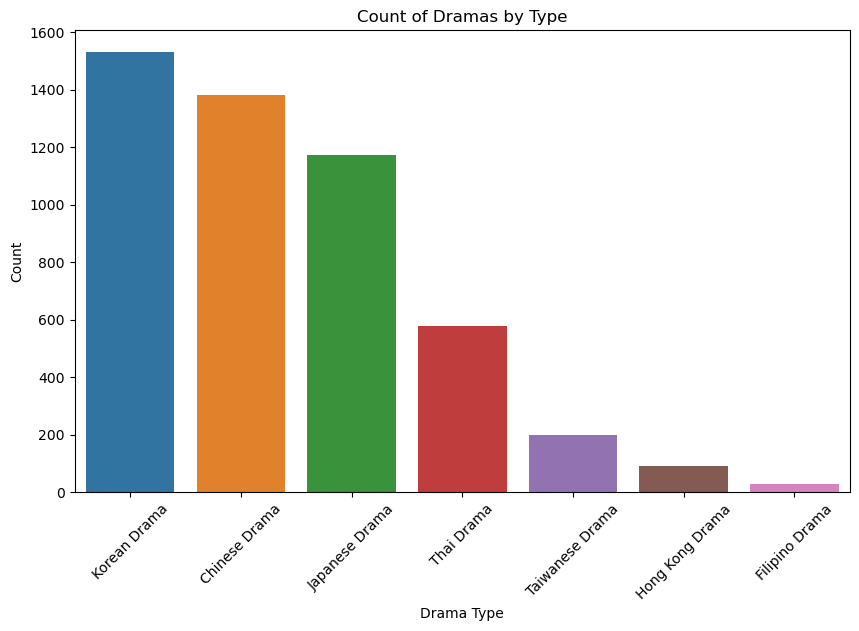

In [17]:
# Plot the count of each drama type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_dramas, x='drama_type', order=df_dramas['drama_type'].value_counts().index)
plt.title('Count of Dramas by Type')
plt.xlabel('Drama Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

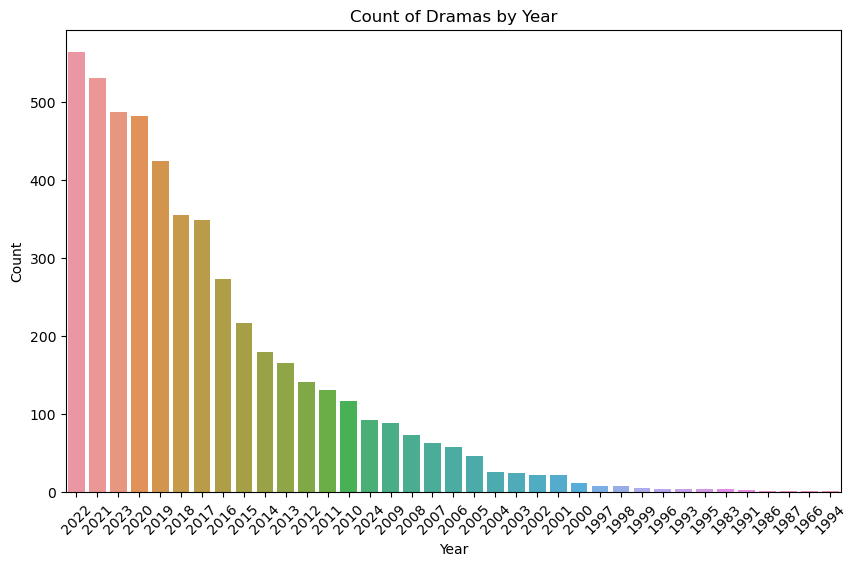

In [18]:
# Plot the count dramas per year
plt.figure(figsize=(10, 6))
sns.countplot(data=df_dramas, x='year', order=df_dramas['year'].value_counts().index)
plt.title('Count of Dramas by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 4. Data Preparation

### 4.1 Cleaning the data

#### Remove \n\n from the 'title' column values

In [19]:
df_dramas['title'] = df_dramas['title'].str.replace('\n\n', '')

In [20]:
print(df_dramas.head())

   drama_id                       title     drama_type  year  rating  \
0         1        Twinkling Watermelon   Korean Drama  2023     9.2   
1         2              Move to Heaven   Korean Drama  2021     9.1   
2         3           Weak Hero Class 1   Korean Drama  2022     9.1   
3         4  Hospital Playlist Season 2   Korean Drama  2021     9.1   
4         5             Nirvana in Fire  Chinese Drama  2015     9.1   

   episodes                                                url  \
0        16  https://mydramalist.com/739603-sparkling-water...   
1        10       https://mydramalist.com/49231-move-to-heaven   
2         8           https://mydramalist.com/702267-weak-hero   
3        12  https://mydramalist.com/57173-hospital-playlist-2   
4        54       https://mydramalist.com/9025-nirvana-in-fire   

                                       genre  \
0          Romance,  Youth,  Drama,  Fantasy   
1                               Life,  Drama   
2                     Acti

### 4.2 Replacing null values in 'overview' column with 'No overview available'

In [21]:
df_dramas['overview'].fillna('No overview available', inplace=True)

I've chosen to replace null values in the overview column with 'no overview available' because upon closer inspection, these dramas are older and by adding this description will give me a thorough and preceise data analysis.

### 4.3 Replace null values in 'tag' column with the most common tag

In [22]:
most_common_tag = df_dramas['tag'].mode()[0]
df_dramas['tag'].fillna(most_common_tag, inplace=True)

Replacing null values in the 'tag' column with the most common tag helps maintain consistency and completeness in the dataset. This ensures that all entries have a relevant tag, facilitating better organization and analysis of the data.

In [23]:
#Check the dataset for null values after replacing them
print(df_dramas.isnull().sum())

drama_id              0
title                 0
drama_type            0
year                  0
rating                0
episodes              0
url                   0
genre                 0
overview              0
tag                   0
main_cast             0
country               0
aired                 0
aired_on            190
original_network    237
duration              0
content_rating        0
image_url             0
dtype: int64


In [24]:
df_dramas['main_cast'][4467]

'Kim Do Geon, Yoo Hye In, Jung Shin Hye, Kim Hyun Mok, Kim Nu Ri, Steve Noh'

## 5. Selecting the data for modelling

In [25]:
dramas = df_dramas[['drama_id','title','overview','genre','tag','main_cast']]

In [26]:
dramas.head()

,drama_id,title,overview,genre,tag,main_cast
0,1,Twinkling Watermelon,"In , Eun Gyeol is a CODA Child of Deaf Adults ...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ryeoun, Choi Hyun Wook, Seol In Ah, Shin Eun S..."
1,2,Move to Heaven,Han Geu Roo is an autistic yearold. He works f...,"Life, Drama","Uncle-Nephew Relationship, Autism, Death, Tear...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
2,3,Weak Hero Class 1,Yeon Shi Eun is a model student who ranks at t...,"Action, Youth, Drama","Skilled Fighter, Violence, Adapted From A Webt...","Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ..."
3,4,Hospital Playlist Season 2,Everyday is extraordinary for five doctors and...,"Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Multiple Couples,...","Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim..."
4,5,Nirvana in Fire,"In sixthcentury China, the Emperor of Great Li...","Military, Historical, Drama, Political","Power Struggle, Smart Male Lead, Hidden Identi...","Hu Ge, Liu Tao, Wang Kai, Chen Long, Victor Hu..."


## 6. Construct the data

### 6.1 Convert overview into a list of words

In [27]:
dramas['overview'] = dramas['overview'].apply(lambda x: x.split())

C:\Users\noorh\AppData\Local\Temp\ipykernel_52760\648709939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dramas['overview'] = dramas['overview'].apply(lambda x: x.split())


In [28]:
dramas.overview[400]

['Shen',
 'Qin,',
 'the',
 'Prime',
 'Ministers',
 'daughter,',
 'is',
 'due',
 'to',
 'be',
 'married',
 'to',
 'a',
 'powerful',
 'general,',
 'Xiao',
 'Han',
 'Sheng,',
 'but',
 'she',
 'is',
 'already',
 'in',
 'love',
 'with',
 'another',
 'man,',
 'Prince',
 'Ning.',
 'In',
 'a',
 'nefarious',
 'bid',
 'to',
 'disentangle',
 'herself',
 'from',
 'this',
 'marriage,',
 'Shen',
 'Qin',
 'traps',
 'a',
 'female',
 'artist,',
 'Shi',
 'Qi,',
 'and',
 'uses',
 'a',
 'magician',
 'to',
 'perform',
 'a',
 'type',
 'of',
 'sorcery',
 'that',
 'enables',
 'the',
 'two',
 'ladies',
 'to',
 'swap',
 'faces.',
 'Shi',
 'Qi',
 'wakes',
 'up',
 'with',
 'her',
 'face',
 'now',
 'belonging',
 'to',
 'the',
 'Prime',
 'Ministers',
 'daughter',
 'and',
 'is',
 'blackmailed',
 'by',
 'Shen',
 'Qin',
 'into',
 'marrying',
 'Xiao',
 'Han',
 'Sheng.',
 'To',
 'her',
 'surprise,',
 'she',
 'recognises',
 'Xiao',
 'Han',
 'Sheng',
 'from',
 'an',
 'old',
 'encounter',
 'in',
 'the',
 'past.',
 'Conflic

In [29]:
dramas.head()

,drama_id,title,overview,genre,tag,main_cast
0,1,Twinkling Watermelon,"[In, ,, Eun, Gyeol, is, a, CODA, Child, of, De...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ryeoun, Choi Hyun Wook, Seol In Ah, Shin Eun S..."
1,2,Move to Heaven,"[Han, Geu, Roo, is, an, autistic, yearold., He...","Life, Drama","Uncle-Nephew Relationship, Autism, Death, Tear...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
2,3,Weak Hero Class 1,"[Yeon, Shi, Eun, is, a, model, student, who, r...","Action, Youth, Drama","Skilled Fighter, Violence, Adapted From A Webt...","Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ..."
3,4,Hospital Playlist Season 2,"[Everyday, is, extraordinary, for, five, docto...","Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Multiple Couples,...","Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim..."
4,5,Nirvana in Fire,"[In, sixthcentury, China,, the, Emperor, of, G...","Military, Historical, Drama, Political","Power Struggle, Smart Male Lead, Hidden Identi...","Hu Ge, Liu Tao, Wang Kai, Chen Long, Victor Hu..."


Turning the overview text into a list of words helps the recommender system. Each word then becomes a feature that the system can use to understand the content of the overview and make better recommendations.

### 6.2 Removing space for the column values

In [30]:
dramas.tag[0]

'Time Travel, Child From The Future, Sign Language, Father-Son Relationship, Deafness, 1990s, Music, Coming Of Age, Friendship, Comedy'

In [31]:
dramas['tag'] = dramas['tag'].apply(lambda x: x.replace(" ", ""))
dramas['main_cast'] = dramas['main_cast'].apply(lambda x: x.replace(" ", ""))

C:\Users\noorh\AppData\Local\Temp\ipykernel_52760\1995321294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dramas['tag'] = dramas['tag'].apply(lambda x: x.replace(" ", ""))
C:\Users\noorh\AppData\Local\Temp\ipykernel_52760\1995321294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dramas['main_cast'] = dramas['main_cast'].apply(lambda x: x.replace(" ", ""))


In [32]:
dramas.head()

,drama_id,title,overview,genre,tag,main_cast
0,1,Twinkling Watermelon,"[In, ,, Eun, Gyeol, is, a, CODA, Child, of, De...","Romance, Youth, Drama, Fantasy","TimeTravel,ChildFromTheFuture,SignLanguage,Fat...","Ryeoun,ChoiHyunWook,SeolInAh,ShinEunSoo,KimJoo..."
1,2,Move to Heaven,"[Han, Geu, Roo, is, an, autistic, yearold., He...","Life, Drama","Uncle-NephewRelationship,Autism,Death,Tearjerk...","LeeJeHoon,TangJunSang,HongSeungHee,JungSukYong..."
2,3,Weak Hero Class 1,"[Yeon, Shi, Eun, is, a, model, student, who, r...","Action, Youth, Drama","SkilledFighter,Violence,AdaptedFromAWebtoon,Fr...","ParkJiHoon,ChoiHyunWook,HongKyung,KimSuGyeom,L..."
3,4,Hospital Playlist Season 2,"[Everyday, is, extraordinary, for, five, docto...","Romance, Life, Drama, Medical","MultipleMains,Band,Music,MultipleCouples,Comed...","JoJungSuk,YooYeonSeok,JungKyungHo,KimDaeMyung,..."
4,5,Nirvana in Fire,"[In, sixthcentury, China,, the, Emperor, of, G...","Military, Historical, Drama, Political","PowerStruggle,SmartMaleLead,HiddenIdentity,Sch...","HuGe,LiuTao,WangKai,ChenLong,VictorHuang,DingY..."


Taking out spaces from the column values cleans up the data, making it clearer. This helps the recommender system work better because it can focus on the important parts without being distracted by extra spaces. So, overall, getting rid of spaces improves how well the recommender system works by making things more consistent and accurate.

### 6.3 Concatenate the values

In [33]:
dramas['new_tags'] = dramas['overview'].astype(str) + dramas['genre'].astype(str) + dramas['tag'].astype(str) + dramas['main_cast'].astype(str)

C:\Users\noorh\AppData\Local\Temp\ipykernel_52760\958313617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dramas['new_tags'] = dramas['overview'].astype(str) + dramas['genre'].astype(str) + dramas['tag'].astype(str) + dramas['main_cast'].astype(str)


In [34]:
dramas.head()

,drama_id,title,overview,genre,tag,main_cast,new_tags
0,1,Twinkling Watermelon,"[In, ,, Eun, Gyeol, is, a, CODA, Child, of, De...","Romance, Youth, Drama, Fantasy","TimeTravel,ChildFromTheFuture,SignLanguage,Fat...","Ryeoun,ChoiHyunWook,SeolInAh,ShinEunSoo,KimJoo...","['In', ',', 'Eun', 'Gyeol', 'is', 'a', 'CODA',..."
1,2,Move to Heaven,"[Han, Geu, Roo, is, an, autistic, yearold., He...","Life, Drama","Uncle-NephewRelationship,Autism,Death,Tearjerk...","LeeJeHoon,TangJunSang,HongSeungHee,JungSukYong...","['Han', 'Geu', 'Roo', 'is', 'an', 'autistic', ..."
2,3,Weak Hero Class 1,"[Yeon, Shi, Eun, is, a, model, student, who, r...","Action, Youth, Drama","SkilledFighter,Violence,AdaptedFromAWebtoon,Fr...","ParkJiHoon,ChoiHyunWook,HongKyung,KimSuGyeom,L...","['Yeon', 'Shi', 'Eun', 'is', 'a', 'model', 'st..."
3,4,Hospital Playlist Season 2,"[Everyday, is, extraordinary, for, five, docto...","Romance, Life, Drama, Medical","MultipleMains,Band,Music,MultipleCouples,Comed...","JoJungSuk,YooYeonSeok,JungKyungHo,KimDaeMyung,...","['Everyday', 'is', 'extraordinary', 'for', 'fi..."
4,5,Nirvana in Fire,"[In, sixthcentury, China,, the, Emperor, of, G...","Military, Historical, Drama, Political","PowerStruggle,SmartMaleLead,HiddenIdentity,Sch...","HuGe,LiuTao,WangKai,ChenLong,VictorHuang,DingY...","['In', 'sixthcentury', 'China,', 'the', 'Emper..."


Combining values from different columns enriches the context of each entry, expands the feature space, improves similarity calculation, and simplifies data input, enhancing the effectiveness of the recommender system.

### 6.4 New Data Frame

In [35]:
new_dramas_df = dramas[['drama_id','title','new_tags']]

In [36]:
new_dramas_df['new_tags'][0]

"['In', ',', 'Eun', 'Gyeol', 'is', 'a', 'CODA', 'Child', 'of', 'Deaf', 'Adults', 'highschool', 'student,', 'but', 'he', 'has', 'a', 'passion', 'for', 'music.', 'During', 'the', 'day,', 'he', 'is', 'a', 'studious', 'model', 'pupil,', 'but', 'at', 'night,', 'he', 'rocks', 'out', 'as', 'a', 'guitarist', 'in', 'a', 'band.', 'But', 'when', 'he', 'stumbles', 'across', 'a', 'strange', 'yet', 'alluring', 'music', 'store,', 'he', 'goes', 'hurtling', 'back', 'in', 'time', 'to', '.', 'Here,', 'he', 'comes', 'face', 'to', 'face', 'with', 'his', 'father,', 'Ha', 'Yi', 'Chan', 'as', 'a', 'high', 'schooler!', 'Yi', 'Chan', 'takes', 'Eun', 'Gyeol', 'for', 'a', 'lunatic', 'when', 'the', 'latter', 'calls', 'him', 'dad.', 'Worse', 'still,', 'it', 'looks', 'like', 'Yi', 'Chan', 'has', 'a', 'crush', 'on', 'an', 'icy', 'cellist', 'named', 'Se', 'Kyeong', 'not', 'his', 'future', 'mother,', 'Cheong', 'Ah!', 'In', 'a', 'bid', 'to', 'put', 'things', 'right,', 'Eun', 'Gyeol', 'joins', 'a', 'band', 'fronted', 'by

In [37]:
new_dramas_df.head()

,drama_id,title,new_tags
0,1,Twinkling Watermelon,"['In', ',', 'Eun', 'Gyeol', 'is', 'a', 'CODA',..."
1,2,Move to Heaven,"['Han', 'Geu', 'Roo', 'is', 'an', 'autistic', ..."
2,3,Weak Hero Class 1,"['Yeon', 'Shi', 'Eun', 'is', 'a', 'model', 'st..."
3,4,Hospital Playlist Season 2,"['Everyday', 'is', 'extraordinary', 'for', 'fi..."
4,5,Nirvana in Fire,"['In', 'sixthcentury', 'China,', 'the', 'Emper..."


### 6.5 Change to lower case

In [38]:
new_dramas_df['new_tags'] = new_dramas_df['new_tags'].apply(lambda x:x.lower())

C:\Users\noorh\AppData\Local\Temp\ipykernel_52760\149169188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dramas_df['new_tags'] = new_dramas_df['new_tags'].apply(lambda x:x.lower())


In [39]:
new_dramas_df.head()

,drama_id,title,new_tags
0,1,Twinkling Watermelon,"['in', ',', 'eun', 'gyeol', 'is', 'a', 'coda',..."
1,2,Move to Heaven,"['han', 'geu', 'roo', 'is', 'an', 'autistic', ..."
2,3,Weak Hero Class 1,"['yeon', 'shi', 'eun', 'is', 'a', 'model', 'st..."
3,4,Hospital Playlist Season 2,"['everyday', 'is', 'extraordinary', 'for', 'fi..."
4,5,Nirvana in Fire,"['in', 'sixthcentury', 'china,', 'the', 'emper..."


### 6.6 Stemming using NLTK's PorterStemmer

In [40]:
import nltk

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [42]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
        
    return ' '.join(y)

#### Testing newly created function

In [43]:
ps.stem('loving')

'love'

In [44]:
stem('in , eun gyeol is a coda child of deaf adults highschool student, but he has a passion for music. during the day, he is a studious model pupil, but at night, he rocks out as a guitarist in a band. but when he stumbles across a strange yet alluring music store, he goes hurtling back in time to .  here, he comes face to face with his father, ha yi chan  as a high schooler! yi chan takes eun gyeol for a lunatic when the latter calls him dad. worse still, it looks like yi chan has a crush on an icy cellist named se kyeong  not his future mother, cheong ah!  in a bid to put things right, eun gyeol joins a band fronted by his future father. but will this be enough to help eun gyeol bring his future parents together... and will he ever get back to the s? romance,  youth,  drama,  fantasytimetravel,childfromthefuture,signlanguage,father-sonrelationship,deafness,1990s,music,comingofage,friendship,comedyryeoun,choihyunwook,seolinah,shineunsoo,kimjooryoung,bongjaehyun')

'in , eun gyeol is a coda child of deaf adult highschool student, but he ha a passion for music. dure the day, he is a studiou model pupil, but at night, he rock out as a guitarist in a band. but when he stumbl across a strang yet allur music store, he goe hurtl back in time to . here, he come face to face with hi father, ha yi chan as a high schooler! yi chan take eun gyeol for a lunat when the latter call him dad. wors still, it look like yi chan ha a crush on an ici cellist name se kyeong not hi futur mother, cheong ah! in a bid to put thing right, eun gyeol join a band front by hi futur father. but will thi be enough to help eun gyeol bring hi futur parent together... and will he ever get back to the s? romance, youth, drama, fantasytimetravel,childfromthefuture,signlanguage,father-sonrelationship,deafness,1990s,music,comingofage,friendship,comedyryeoun,choihyunwook,seolinah,shineunsoo,kimjooryoung,bongjaehyun'

#### Applying it to the dataset

In [45]:
new_dramas_df['new_tags'] = new_dramas_df['new_tags'].apply(stem)

C:\Users\noorh\AppData\Local\Temp\ipykernel_52760\1831288404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dramas_df['new_tags'] = new_dramas_df['new_tags'].apply(stem)


### 6.7 Text Vectorization

In [46]:
new_dramas_df['new_tags'][0]

"['in', ',', 'eun', 'gyeol', 'is', 'a', 'coda', 'child', 'of', 'deaf', 'adults', 'highschool', 'student,', 'but', 'he', 'has', 'a', 'passion', 'for', 'music.', 'during', 'the', 'day,', 'he', 'is', 'a', 'studious', 'model', 'pupil,', 'but', 'at', 'night,', 'he', 'rocks', 'out', 'as', 'a', 'guitarist', 'in', 'a', 'band.', 'but', 'when', 'he', 'stumbles', 'across', 'a', 'strange', 'yet', 'alluring', 'music', 'store,', 'he', 'goes', 'hurtling', 'back', 'in', 'time', 'to', '.', 'here,', 'he', 'comes', 'face', 'to', 'face', 'with', 'his', 'father,', 'ha', 'yi', 'chan', 'as', 'a', 'high', 'schooler!', 'yi', 'chan', 'takes', 'eun', 'gyeol', 'for', 'a', 'lunatic', 'when', 'the', 'latter', 'calls', 'him', 'dad.', 'worse', 'still,', 'it', 'looks', 'like', 'yi', 'chan', 'has', 'a', 'crush', 'on', 'an', 'icy', 'cellist', 'named', 'se', 'kyeong', 'not', 'his', 'future', 'mother,', 'cheong', 'ah!', 'in', 'a', 'bid', 'to', 'put', 'things', 'right,', 'eun', 'gyeol', 'joins', 'a', 'band', 'fronted', 'by

#### Import library to use the count vectorization

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [48]:
cv.fit_transform(new_dramas_df['new_tags']).toarray().shape

(4980, 5000)

The code creates a document-term matrix for the 'new_tags' column in the `new_dramas_df` DataFrame. It limits the features to the 5000 most common words and excludes common English stop words. The final output is the shape of the resulting array, showing the number of documents and the number of features (words).

In [49]:
vectors = cv.fit_transform(new_dramas_df['new_tags']).toarray()

In [50]:
vectors

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
feature_names = cv.get_feature_names_out()
print(feature_names)
#print(len(feature_names))

['19' '1980s' '1990s' ... 'zong' 'zu' 'zuo']


### 7. Modelling

### 7.1 Cosine Similarity

In [52]:
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
similarity = cosine_similarity(vectors)

In [54]:
similarity.shape

(4980, 4980)

In [55]:
similarity[0]

array([1.        , 0.02837268, 0.21155435, ..., 0.02344036, 0.10548163,
       0.06907372])

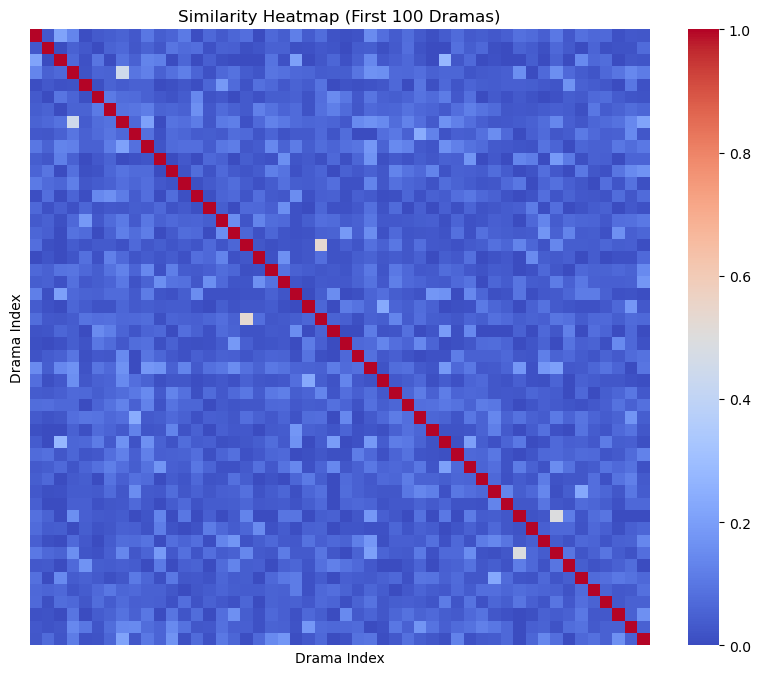

In [56]:
# Select a subset of the similarity matrix (e.g., the first 100 dramas)
subset_similarity = similarity[:50, :50]

# Plot the heatmap for the subset
plt.figure(figsize=(10, 8))
sns.heatmap(subset_similarity, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Similarity Heatmap (First 100 Dramas)')
plt.xlabel('Drama Index')
plt.ylabel('Drama Index')
plt.show()

In [175]:
sorted(list(enumerate(similarity[0])),reverse = True, key=lambda x:x[1])[1:7]

[(3782, 0.2790781528257191),
 (4640, 0.2728624948955202),
 (689, 0.2710906605130818),
 (2599, 0.2691668720495606),
 (4935, 0.2605250528594531),
 (1659, 0.2530845506828974)]

In [63]:
def recommend(drama):
    # Find the index of the drama that matches the title
    drama_index = new_dramas_df[new_dramas_df['title'] == drama].index[0]
    
    # Get the similarity scores for this drama
    distances = similarity[drama_index]
    
    # Create a list of (index, similarity score) tuples and sort it
    # Reverse=True sorts in descending order, key=lambda x:x[1] sorts by the similarity score
    drama_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    
    # Use the separate function to display the recommendations
    display_recommendations(drama, drama_list)
    
    return drama_list  # Return the list of recommended dramas and their similarity scores





In [64]:
recommendations = recommend('I Am Nobody')

Recommendations for 'I Am Nobody':
My Kung Fu Girlfriend (Similarity Score: 0.24)
Demi-Gods and Semi-Devils (Similarity Score: 0.23)
The Heaven Sword and Dragon Saber (Similarity Score: 0.23)
The Legend of the Condor Heroes (Similarity Score: 0.23)
New Smiling Proud Wanderer (Similarity Score: 0.22)


In [66]:
recommendations = recommend('The Glory')

Recommendations for 'The Glory':
Shiritsu Bakaleya Koukou (Similarity Score: 0.43)
Yankee Bokou ni Kaeru (Similarity Score: 0.42)
Gakkou no Kaidan (Similarity Score: 0.42)
GTO: Remake Season 2 (Similarity Score: 0.41)
My Boss, My Hero (Similarity Score: 0.41)


In [67]:
recommendations = recommend('Crash Landing on You')

Recommendations for 'Crash Landing on You':
Comrades (Similarity Score: 0.32)
Myung Wol the Spy (Similarity Score: 0.30)
Doctor Stranger (Similarity Score: 0.28)
Curtain Call (Similarity Score: 0.23)
Dr. Romantic Season 3 (Similarity Score: 0.23)


In [68]:
recommendations = recommend('Flower of Evil')

Recommendations for 'Flower of Evil':
Baek Hee Has Returned (Similarity Score: 0.27)
Beyond Evil (Similarity Score: 0.27)
Mask (Similarity Score: 0.27)
Marry My Husband (Similarity Score: 0.27)
Children of Nobody (Similarity Score: 0.26)


In [69]:
recommendations = recommend('Alchemy of Souls')

Recommendations for 'Alchemy of Souls':
Alchemy of Souls Season 2: Light and Shadow (Similarity Score: 0.24)
Golden Rainbow (Similarity Score: 0.22)
Stupid Cupid (Similarity Score: 0.21)
Nothing Gold Can Stay (Similarity Score: 0.21)
Wonderful Mama (Similarity Score: 0.20)


In [70]:
recommendations = recommend('Squid Game')

Recommendations for 'Squid Game':
W no Higeki (Similarity Score: 0.27)
Children of Nobody (Similarity Score: 0.23)
Liar Game (Similarity Score: 0.21)
Imawa no Kuni no Alice Season 2 (Similarity Score: 0.20)
Familiar Wife (Similarity Score: 0.20)


### Deploy to web

In [178]:
import pickle

In [179]:
# Pickle the DataFrame
with open('asian_dramas.pkl', 'wb') as f:
    pickle.dump(new_dramas_df, f)

In [106]:
new_dramas_df['title'].values

array(['Twinkling Watermelon', 'Move to Heaven', 'Weak Hero Class 1', ...,
       'Hataraki Man', 'Mon Rak Asoon', 'Love, Just Come'], dtype=object)

In [107]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [108]:
print(new_dramas_df.head())

   drama_id                       title  \
0         1        Twinkling Watermelon   
1         2              Move to Heaven   
2         3           Weak Hero Class 1   
3         4  Hospital Playlist Season 2   
4         5             Nirvana in Fire   

                                            new_tags  
0  in , eun gyeol is a coda child of deaf adult h...  
1  han geu roo is an autist yearold. he work for ...  
2  yeon shi eun is a model student who rank at th...  
3  everyday is extraordinari for five doctor and ...  
4  in sixthcenturi china, the emperor of great li...  
drama_id     int64
title       object
new_tags    object
dtype: object
drama_id    0
title       0
new_tags    0
dtype: int64


In [109]:
print(new_dramas_df.dtypes)

drama_id     int64
title       object
new_tags    object
dtype: object


In [110]:
print(new_dramas_df.isnull().sum())

drama_id    0
title       0
new_tags    0
dtype: int64


In [111]:
print(new_dramas_df['title'].unique())

['Twinkling Watermelon' 'Move to Heaven' 'Weak Hero Class 1' ...
 'Hataraki Man' 'Mon Rak Asoon' 'Love, Just Come']


In [112]:
print(new_dramas_df[new_dramas_df.duplicated(subset=['title'], keep=False)])

      drama_id                    title  \
10          11                    Reset   
24          25                   Mother   
37          38               My Dearest   
107        108  While You Were Sleeping   
145        146   Descendants of the Sun   
...        ...                      ...   
4855      4856                     Stay   
4857      4858                    Hyena   
4871      4872         First Love Again   
4965      4966          Falling in Love   
4968      4969             Endless Love   

                                               new_tags  
10    an unexplain phenomena find collegego student,...  
24    realiz one of her student is be abused, school...  
37    a lovestori between a noblewoman and a mysteri...  
107   nam hong ju, endow with the abil to forese eve...  
145   a love stori that develop between a surgeon an...  
...                                                 ...  
4855  for filipino filmmak andr lee , win the grand ...  
4857  a quirki male